In [1]:
#Implements of Decision Tree for bank.csv file
#bank.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
#select X(input features) and Y(target) from dataset df
X=df.drop("deposit",axis=1)
Y=df["deposit"]

In [8]:
#Train_Test_Split : 70% and 30%
from sklearn.model_selection import train_test_split

In [9]:
#Split our dataset in train test of 70% & 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
from sklearn.metrics import classification_report

In [11]:
def create_model(model):   #user defined function
    model.fit(X_train,Y_train)  #model train
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [14]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349



In [15]:
#Lets checkout what are the imporatant features
#that are selected by decision tree
dt1.feature_importances_
#feature_importances_inbuilt command of decisiontree classifier

array([0.07918074, 0.03459017, 0.01560543, 0.01463559, 0.00071306,
       0.09319576, 0.04292487, 0.00507567, 0.06154448, 0.08033747,
       0.09578887, 0.34722523, 0.01730669, 0.06024745, 0.01524515,
       0.03638338])

In [16]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [17]:
#we visualize the tree
from sklearn import tree

In [18]:
features=X.columns

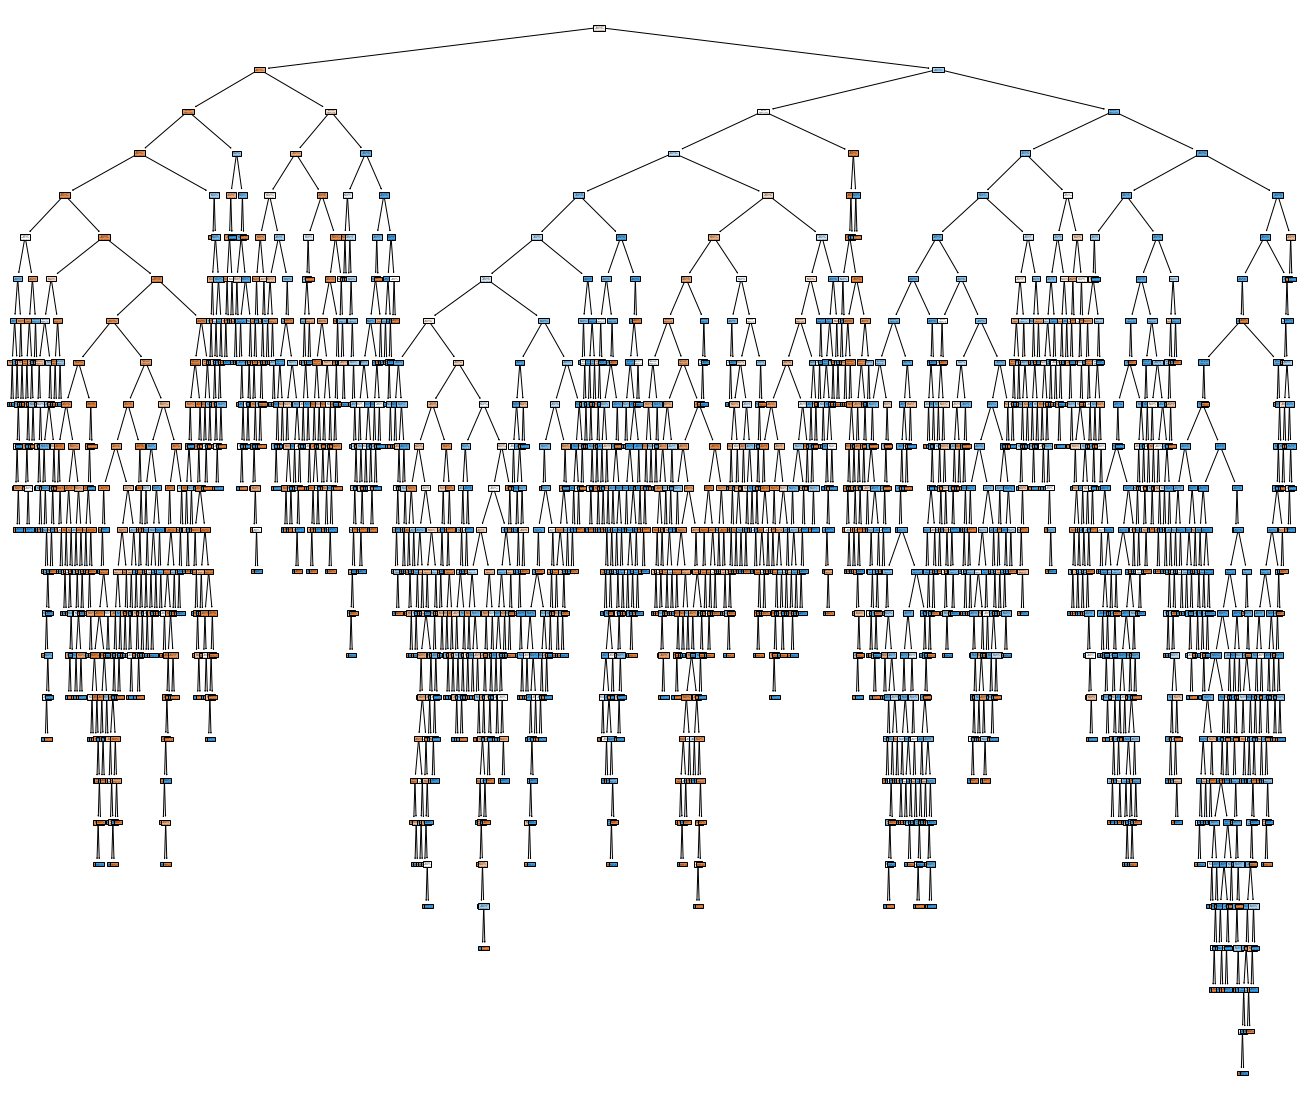

In [19]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
#model is overfit so we reduced a overfitting situation by using pruning
#technique

# Pruning Technique

In [ ]:
'''
1. First Pruning tech. withy the help of max_depth()
'''
#max_depth() not more than 8

In [35]:
#Create the object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=5)   #set max_depth=5

In [36]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



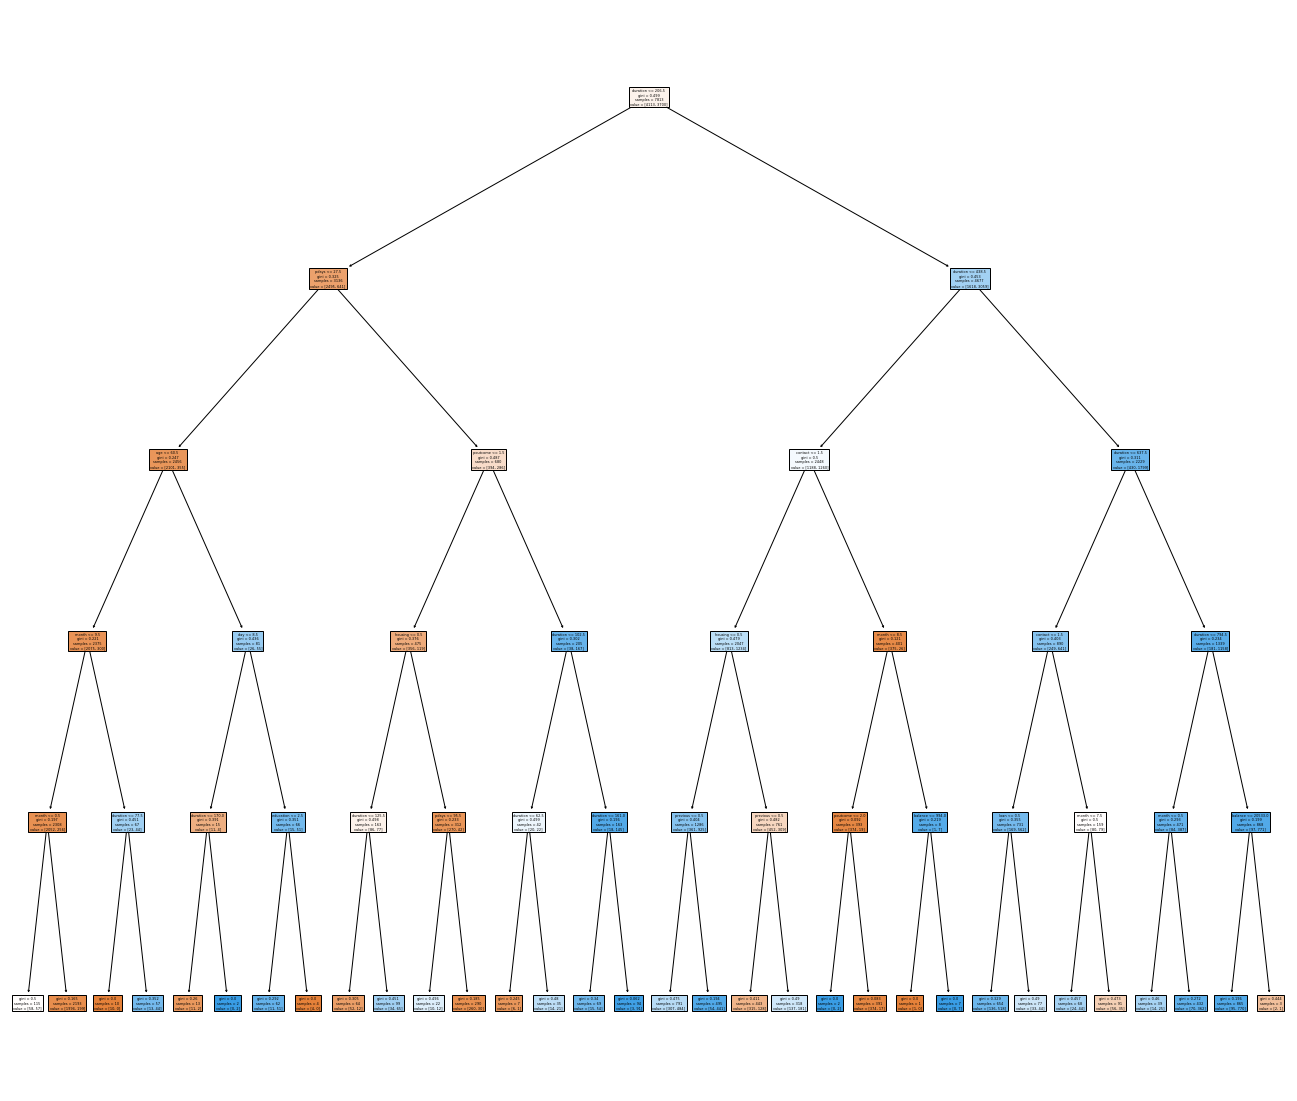

In [37]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [ ]:
'''2. Second pruning tech. withy the help of min_samples_leaf'''

In [41]:
#Create the object of DecisionTreeClassifier
dt3=DecisionTreeClassifier(min_samples_leaf=42)  #min_samples_leaf=50

In [42]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1760
           1       0.79      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



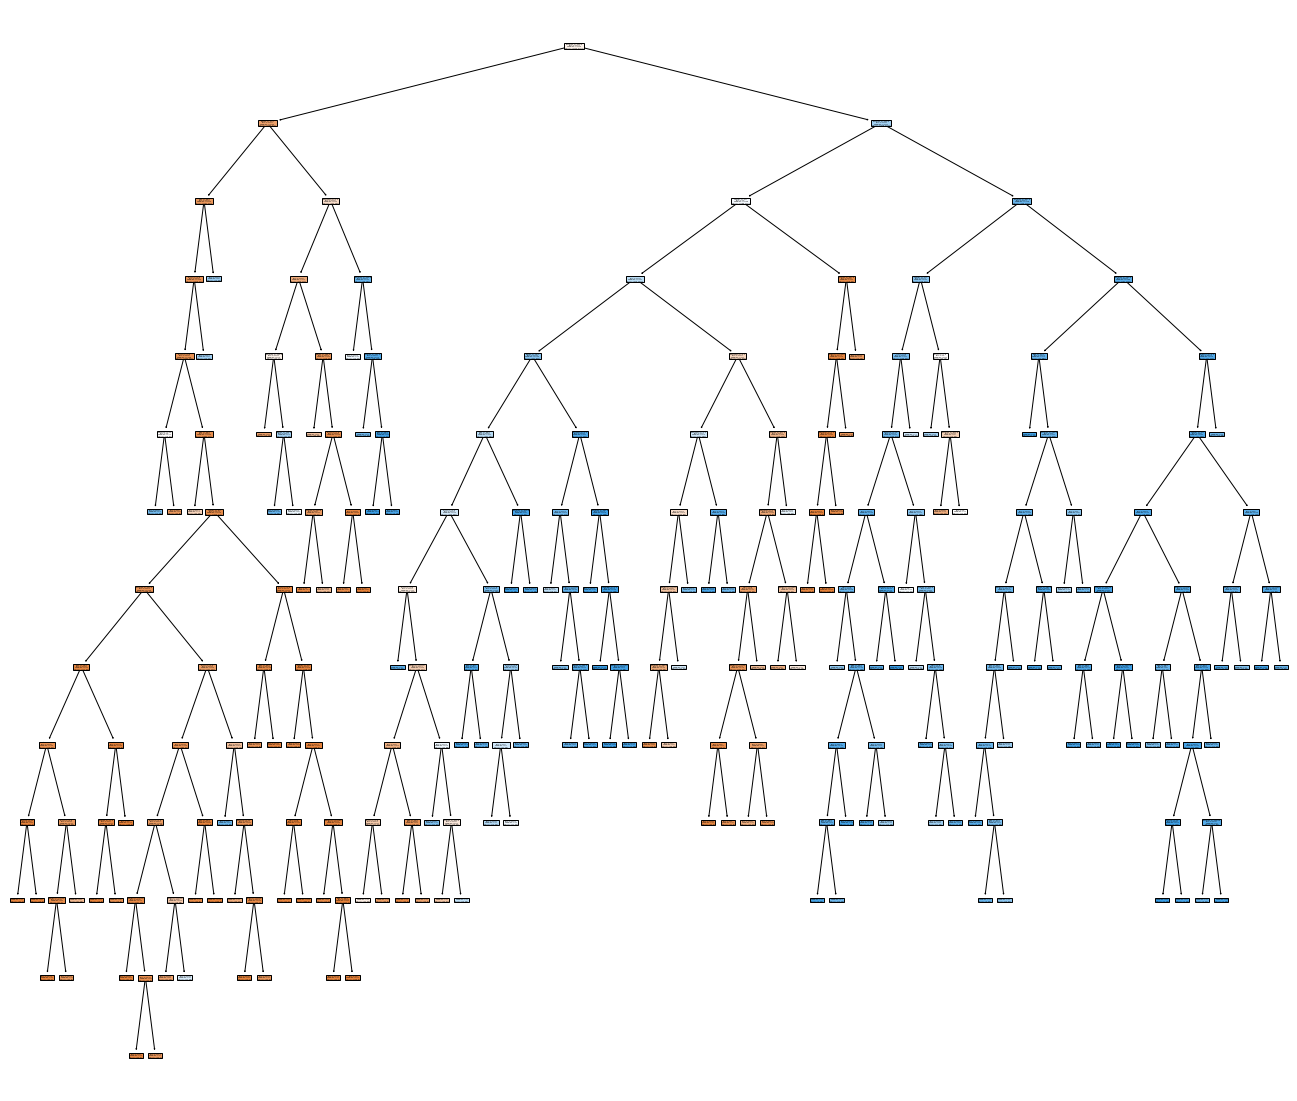

In [43]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [46]:
#Create the object of DecisionTreeClassifier
dt4=DecisionTreeClassifier(min_samples_leaf=42,criterion="entropy")  #min_samples_leaf=50

In [47]:
dt4=DecisionTreeClassifier(dt4)

In [ ]:
#best recall : 0.87 (second technique is best in this dataset)